<a href="https://colab.research.google.com/github/Reefavibes/AI-Research/blob/main/Notebook_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt

# Normal Random Number Generator

In [ ]:
#CDF PDF

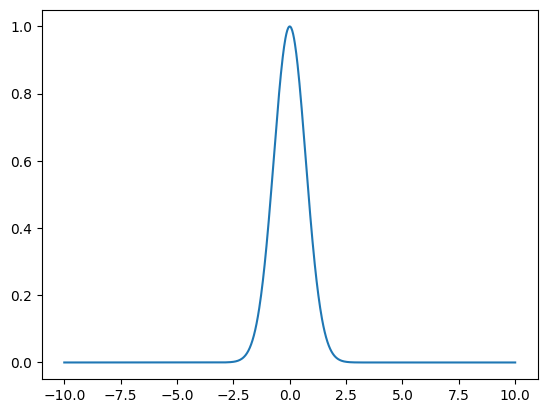

In [ ]:
# Creating a range of x values from -10 to 10, which will serve as our domain for plotting the distribution
# The linspace function generates 1000 points within the given range, providing a smooth curve when plotted
x = np.linspace(-10, 10, 1000)
# Generating y values using an exponential function of x
# NOTE: This does not represent the actual normal distribution's probability density function (PDF).
# This is likely a placeholder or a mistake that should be replaced with the normal_pdf function defined below.
y = 2.71**(-x**2)

# Plotting the function with x on the horizontal axis and y on the vertical axis
# This plot is not correct for the normal distribution and needs to be replaced with the correct PDF plot.
plt.plot(x, y)


$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [ ]:
# Defining a function to calculate the PDF of a normal distribution
# This function will be used to generate the correct y values for plotting the normal distribution
def normal_pdf(x, mu, sigma):
    # Calculating the PDF using the formula for a normal distribution
    return (1 / (np.sqrt(2*np.pi*sigma**2))) * np.exp(- ((x-mu)**2) / (2*sigma**2))

In [ ]:
# Initializing the range of x values for the plot
# We will use these values as inputs to the normal_pdf function to get the corresponding y values
x = np.linspace(-6, 6, 1000)

In [ ]:
x

array([-6.        , -5.98798799, -5.97597598, -5.96396396, -5.95195195,
       -5.93993994, -5.92792793, -5.91591592, -5.9039039 , -5.89189189,
       -5.87987988, -5.86786787, -5.85585586, -5.84384384, -5.83183183,
       -5.81981982, -5.80780781, -5.7957958 , -5.78378378, -5.77177177,
       -5.75975976, -5.74774775, -5.73573574, -5.72372372, -5.71171171,
       -5.6996997 , -5.68768769, -5.67567568, -5.66366366, -5.65165165,
       -5.63963964, -5.62762763, -5.61561562, -5.6036036 , -5.59159159,
       -5.57957958, -5.56756757, -5.55555556, -5.54354354, -5.53153153,
       -5.51951952, -5.50750751, -5.4954955 , -5.48348348, -5.47147147,
       -5.45945946, -5.44744745, -5.43543544, -5.42342342, -5.41141141,
       -5.3993994 , -5.38738739, -5.37537538, -5.36336336, -5.35135135,
       -5.33933934, -5.32732733, -5.31531532, -5.3033033 , -5.29129129,
       -5.27927928, -5.26726727, -5.25525526, -5.24324324, -5.23123123,
       -5.21921922, -5.20720721, -5.1951952 , -5.18318318, -5.17

In [ ]:
# Setting the mean 'mu' and standard deviation 'sigma' for the standard normal distribution
# Standard normal distribution has a mean of 0 and a standard deviation of 1
mu = 0
sigma = 1

In [ ]:
# Calculating the PDF values for a normal distribution using the previously defined normal_pdf function
# The 'pdf' variable will store the computed PDF values for each point in 'x'
pdf = normal_pdf(x, mu, sigma)

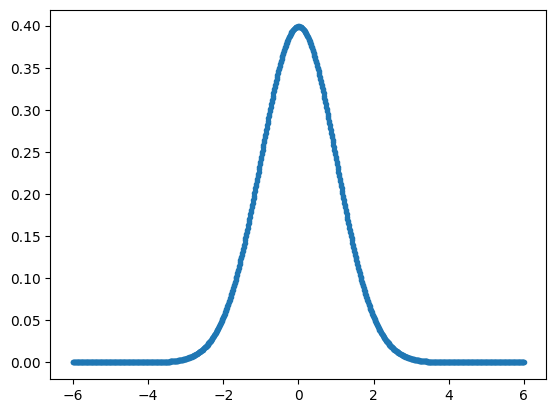

In [ ]:
# Plotting the PDF of the normal distribution
# The '.' in the plot function call indicates that a point marker is used for each data point
plt.plot(x, pdf, '.')

# Uncomment the next line if you need to overlay the original incorrect y values for comparison
# plt.plot(x,y,'g.')

In [ ]:
# Defining a function to calculate the cumulative sum, which could be used to approximate the cumulative distribution function (CDF)
def cumulative_sum(x):
    # Initializing an array of zeros with the same shape as 'x'
    # This will store the cumulative sum values
    y = np.zeros(x.shape)

    # Looping through each index in the 'x' array
    # 'n' will take on each index, allowing us to calculate the cumulative sum up to that point
    for n in range(x.shape[0]):
        # Updating the 'y' array with the cumulative sum of 'pdf' values up to the index 'n'
        y[n] = np.sum(x[0:n])

    # Normalizing the cumulative sum so that it ranges from 0 to 1
    # This step converts the cumulative sum into a proper CDF
    y = y / np.max(y)

    # Returning the normalized cumulative sum, which is an approximation of the CDF
    return y

In [ ]:
# Applying the cumulative_sum function to the PDF values
# The 'cdf' variable will store the cumulative distribution function (CDF) which is the integral of the PDF
# This is an approximation as it sums up the discrete values of the PDF
cdf = cumulative_sum(pdf)

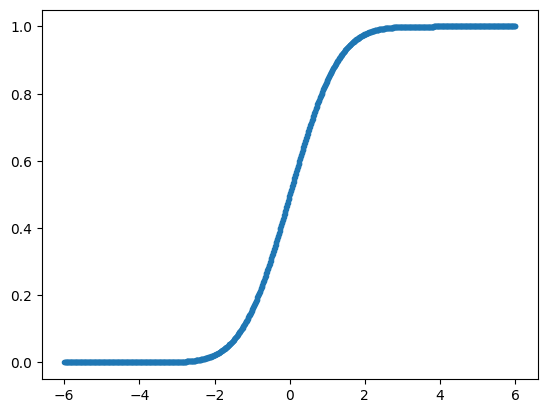

In [ ]:
# Cell [12]: Plotting the CDF of the normal distribution
# The '.' in the plot function call again indicates that a point marker is used for each data point
# This plot visualizes how the probability accumulates over the range of 'x' values
plt.plot(x, cdf, '.')


In [ ]:
# Cell [13]: Demonstrating the relationship between the PDF and CDF of the normal distribution
# The derivative of the CDF should give us the PDF. This is computed by taking the difference between consecutive elements in the 'cdf' array

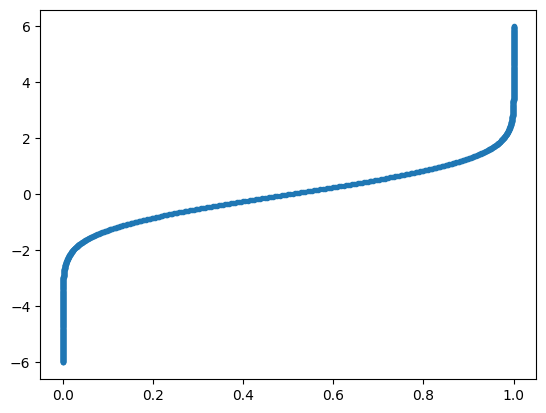

In [ ]:
plt.plot(cdf,x,'.');

In [ ]:
# Cell [15]: Defining a function to find the nearest value in an array
# This could be used to find the closest point in the CDF to a given probability, which is useful in inverse transform sampling
def find_nearest(array, value):
    # Calculating the absolute difference between each element in the array and the given value
    idx = np.argmin(np.abs(array - value))

    # Returning the index of the closest value
    return idx

In [ ]:
# Using the find_nearest function to find the index in the CDF closest to a given probability value (0.1 in this case)
# This index corresponds to the x-value where the CDF is as close as possible to 0.1
find_nearest(cdf, 0.1)

393

In [ ]:
# Retrieving the x-value from the array 'x' at the index found in cell [17]
# This value is the quantile of the normal distribution where the CDF is approximately 0.1
x[393]

-1.2792792792792795

In [ ]:
# Generating 10,000 random numbers uniformly distributed between 0 and 1
# These will be used as probabilities for inverse transform sampling
xr = np.random.random((10000,))

In [ ]:
# Cell [19]: Creating an array of zeros with the same shape as 'xr'
# This will store the sampled values from the normal distribution
w = np.zeros(xr.shape[0])

# Cell [20]: Looping through each generated random number in 'xr'
# For each random number, find the corresponding quantile in the normal distribution using inverse transform sampling
for i in range(xr.shape[0]):
    w[i] = x[find_nearest(cdf, xr[i])]

In [ ]:
# Cell [21]: Checking the shape of the array 'w' to ensure it has 10,000 elements as expected
# This confirms that we have successfully sampled 10,000 values from the normal distribution
w.shape

(10000,)

(array([  1.,   2.,   1.,   6.,   4.,   7.,  12.,  30.,  45.,  61.,  68.,
        121., 130., 203., 231., 260., 373., 375., 434., 545., 573., 627.,
        680., 598., 630., 643., 526., 518., 463., 376., 337., 254., 227.,
        190., 134.,  96.,  63.,  51.,  51.,  16.,  11.,  15.,   6.,   1.,
          1.,   1.,   0.,   1.,   1.,   1.]),
 array([-3.74174174, -3.58126126, -3.42078078, -3.2603003 , -3.09981982,
        -2.93933934, -2.77885886, -2.61837838, -2.4578979 , -2.29741742,
        -2.13693694, -1.97645646, -1.81597598, -1.6554955 , -1.49501502,
        -1.33453453, -1.17405405, -1.01357357, -0.85309309, -0.69261261,
        -0.53213213, -0.37165165, -0.21117117, -0.05069069,  0.10978979,
         0.27027027,  0.43075075,  0.59123123,  0.75171171,  0.91219219,
         1.07267267,  1.23315315,  1.39363363,  1.55411411,  1.71459459,
         1.87507508,  2.03555556,  2.19603604,  2.35651652,  2.516997  ,
         2.67747748,  2.83795796,  2.99843844,  3.15891892,  3.3193994 ,
 

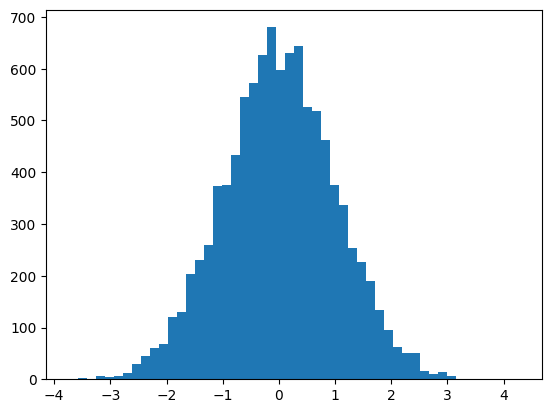

In [ ]:
# Cell [22]: Plotting a histogram of the sampled values
# This should resemble the shape of the normal distribution's PDF if the sampling is correct
plt.hist(w, 50)

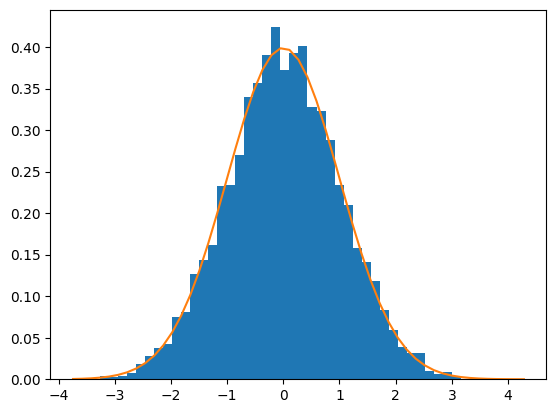

In [ ]:
# Cell: Setting the number of bins for the histogram
num_bins = 50

# Cell: Creating a histogram of the sampled data
# The histogram is normalized (density=True) to form a probability density
# This means the area under the histogram will sum to 1, analogous to a probability density function
n, bins, patches = plt.hist(w, num_bins, density=1)

# Cell: Calculating the theoretical normal distribution PDF using the bins from the histogram for x values
# This PDF is based on the mean ('mu') and standard deviation ('sigma') used to generate the sampled data 'w'
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu)**2))

# Cell: Plotting the calculated PDF over the histogram
# This serves as a visual check to confirm the sampled data ('w') follows the expected normal distribution
plt.plot(bins, y)

# Homework

# Birthday Paradox

In [ ]:
# Importing the random module to generate random numbers
import random

# Defining a function to simulate the birthday paradox
def simulate_birthday_paradox(people, simulations):
    matches = 0  # Counter for the number of successful simulations with at least one matching birthday

    # Running the simulation 'simulations' number of times
    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]  # Generate random birthdays for 'people' number of people
        if len(birthdays) != len(set(birthdays)):  # Check if the list of birthdays has duplicates
            matches += 1  # If duplicates are found, increment the match counter

    # Calculating the probability of at least one match by dividing successful simulations by the total number of simulations
    probability = matches / simulations
    return probability

# Number of people in the room
people = 40

# Number of simulations to run
simulations = 10000

# Calculate the probability using the simulate_birthday_paradox function
probability = simulate_birthday_paradox(people, simulations)
probability


0.8897

# Monty Hall

In [ ]:
# Defining a function to simulate the Monty Hall problem
def simulate_monty_hall_final(simulations):
    # Initializing counters for wins by staying and switching
    wins_switching = 0
    wins_staying = 0

    # Running the simulation 'simulations' number of times
    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    # Return the probabilities
    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching


(0.3407, 0.6593)

# Simple Craps

In [ ]:
# Defining a function to simulate the dice game for a given number of simulations
def simulate_dice_game(simulations):
    # Initialize a counter for the number of wins
    wins = 0

    # Perform the simulations
    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss conditions based on the game rules
        # If the initial roll is 7 or 11, the player wins
        if roll in [7, 11]:
            wins += 1
            continue  # Skip the rest of the loop and proceed with the next simulation
        # If the initial roll is 2, 3, or 12, the player loses (often called "crapping out")
        elif roll in [2, 3, 12]:
            continue  # Skip the rest of the loop and proceed with the next simulation

        # Save the initial roll if it's not an immediate win or loss
        initial_roll = roll

        # Re-roll phase: the player keeps rolling until they roll a 7 (lose) or match their initial roll (win)
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            # If the player rolls a 7, they lose
            if roll == 7:
                break  # Exit the inner loop and proceed with the next simulation
            # If the player matches their initial roll, they win
            elif roll == initial_roll:
                wins += 1
                break  # Exit the inner loop and proceed with the next simulation

    # Calculate the probability of winning by dividing the number of wins by the number of simulations
    probability_of_winning = wins / simulations
    return probability_of_winning

# Set the number of simulations (e.g., 10000)
simulations = 10000

# Calculate the probability of winning the game by running the simulation
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning


0.4927

# Collector's Card Paradox


In [ ]:
# Defining a function to simulate the Collector's Card Paradox
def simulate_card_collectors_problem(n, simulations):
    # Initialize the total number of card packs bought across all simulations
    total_card_packs_bought = 0

    # Perform the simulations
    for _ in range(simulations):
        # Initialize a set to store the unique collected characters
        collected_characters = set()
        # Initialize the number of card packs bought in this simulation
        card_packs_bought = 0

        # Continue buying card packs until all n characters are collected
        while len(collected_characters) < n:
            # Simulate getting a new card from a pack, which could be any of the n characters
            new_card = random.randint(1, n)
            # Add the new card to the set of collected characters
            collected_characters.add(new_card)
            # Increment the number of card packs bought
            card_packs_bought += 1

        # Accumulate the total number of card packs bought across all simulations
        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed to collect all characters
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Set the number of different characters to collect
n = 10

# Calculate the expected number of card packs needed to collect all characters
# This is done by simulating the process a certain number of times and averaging the results
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs


29.3589

In [ ]:
# Importing the random module to generate random numbers
import random

# Defining a function to simulate the sock drawer problem
def simulate_sock_drawer_problem(n, simulations):
    # Initialize the total number of draws across all simulations
    total_draws = 0

    # Perform the simulations
    for _ in range(simulations):
        # Initialize a dictionary to store the count of each sock color
        socks = {}
        # Initialize the number of draws for this simulation
        draws = 0

        # Continue drawing socks until a pair is found
        while True:
            # Randomly draw a sock of a certain color (represented by a number)
            sock_color = random.randint(1, n)
            # Increment the number of draws
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check if there are two socks of the same color, which means a pair is found
            if socks[sock_color] == 2:
                break

        # Add the number of draws for this simulation to the total draws
        total_draws += draws

    # Calculate the average number of draws needed to find a pair across all simulations
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of different colors of socks in the drawer
n = 10

# Number of simulations to run
simulations = 10000

# Calculate the expected number of draws needed to find a pair of socks
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws


4.6689